In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = {}

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 1)
                res = (f'{os.path.basename(file_names[i])} similar to {os.path.basename(file_names[j])}')
                plagiarism_results[res] = sim_score

    api = json.dumps(plagiarism_results)
    return api

if __name__ == "__main__":
    zip_filename = "/content/Sample_Documents.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        print(result)
    else:
        print("The specified file does not exist.")


{"A.txt similar to B.txt": 0.5, "A.txt similar to C.txt": 0.5, "A.txt similar to D.txt": 1.0, "B.txt similar to C.txt": 0.7, "B.txt similar to D.txt": 0.5, "C.txt similar to D.txt": 0.5}


In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = {}

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            # Skip files starting with "._"
            if not file_names[i].startswith("._") and not file_names[j].startswith("._"):
                sim_score = similarity(vectors[i], vectors[j])[0][1]
                if sim_score > 0:
                    sim_score = round(sim_score, 1)
                    res = (f'{os.path.basename(file_names[i])} similar to {os.path.basename(file_names[j])}')
                    plagiarism_results[res] = sim_score

    api = json.dumps(plagiarism_results)
    return api


if __name__ == "__main__":
    zip_filename = "/content/Sample_Documents.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        print(result)
    else:
        print("The specified file does not exist.")


{"A.txt similar to B.txt": 0.5, "A.txt similar to C.txt": 0.5, "A.txt similar to D.txt": 1.0, "B.txt similar to C.txt": 0.7, "B.txt similar to D.txt": 0.5, "C.txt similar to D.txt": 0.5}


In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = {}

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 1)
                res = (f'{os.path.basename(file_names[i])} similar to {os.path.basename(file_names[j])}')
                plagiarism_results[res] = sim_score

    api = json.dumps(plagiarism_results)
    return api

if __name__ == "__main__":
    zip_filename = "/content/New Folder With Items 3.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        print(result)
    else:
        print("The specified file does not exist.")


{"Data Science.txt similar to Compiler construction.txt": 0.6, "Data Science.txt similar to Database Administration.txt": 0.6, "Data Science.txt similar to Database Administration copy.txt": 0.6, "._Data Science.txt similar to ._Compiler construction.txt": 0.6, "._Data Science.txt similar to ._Database Administration.txt": 0.9, "._Data Science.txt similar to ._Database Administration copy.txt": 0.8, "Compiler construction.txt similar to Database Administration.txt": 0.7, "Compiler construction.txt similar to Database Administration copy.txt": 0.7, "._Compiler construction.txt similar to ._Database Administration.txt": 0.6, "._Compiler construction.txt similar to ._Database Administration copy.txt": 0.5, "Database Administration.txt similar to Database Administration copy.txt": 1.0, "._Database Administration.txt similar to ._Database Administration copy.txt": 0.8}


In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = {}

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = "{:.2f}".format(sim_score)  # Format to two decimal places
                res = (f'{os.path.basename(file_names[i])} similar to {os.path.basename(file_names[j])}')
                plagiarism_results[res] = float(sim_score)  # Convert back to float

    api = json.dumps(plagiarism_results)
    return api

if __name__ == "__main__":
    zip_filename = "/content/Sample_Documents.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        print(result)
    else:
        print("The specified file does not exist.")


{"A.txt similar to B.txt": 0.45, "A.txt similar to C.txt": 0.51, "A.txt similar to D.txt": 1.0, "B.txt similar to C.txt": 0.73, "B.txt similar to D.txt": 0.45, "C.txt similar to D.txt": 0.51}


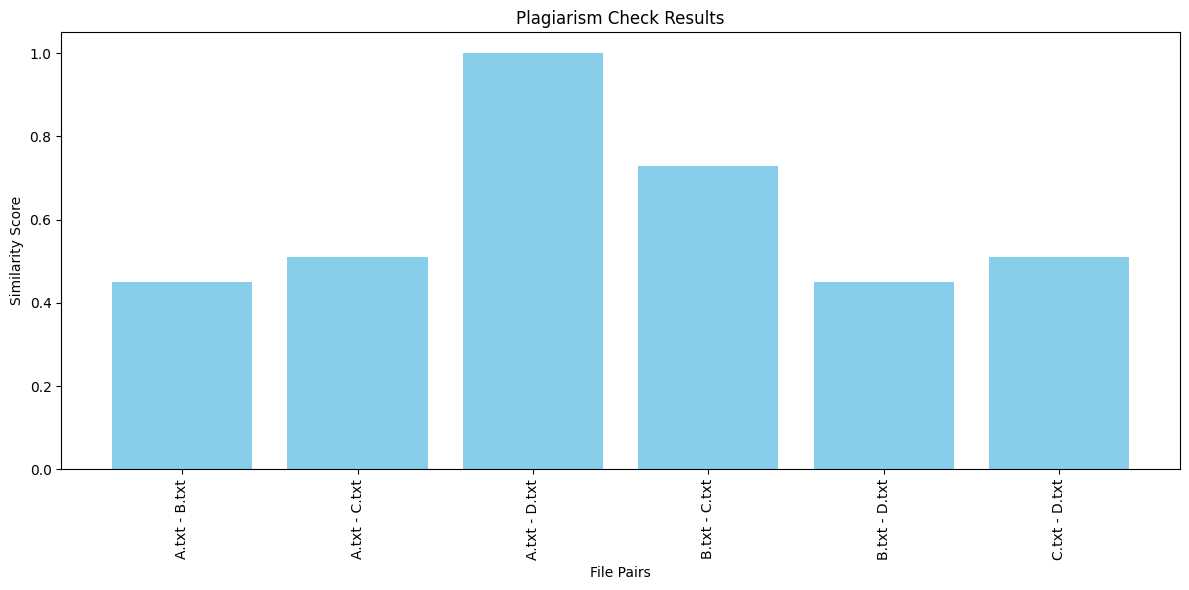

In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = []

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 2)
                file1_name = os.path.basename(file_names[i])
                file2_name = os.path.basename(file_names[j])
                plagiarism_results.append((file1_name, file2_name, sim_score))

    return plagiarism_results

if __name__ == "__main__":
    zip_filename = "/content/Sample_Documents.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        if result:
            file1_names, file2_names, similarity_scores = zip(*result)
            x = np.arange(len(result))

            plt.figure(figsize=(12, 6))
            plt.bar(x, similarity_scores, color='skyblue')
            plt.xticks(x, [f'{file1} - {file2}' for file1, file2 in zip(file1_names, file2_names)], rotation=90)
            plt.xlabel('File Pairs')
            plt.ylabel('Similarity Score')
            plt.title('Plagiarism Check Results')
            plt.tight_layout()

            plt.show()
        else:
            print("No plagiarism found.")
    else:
        print("The specified file does not exist.")


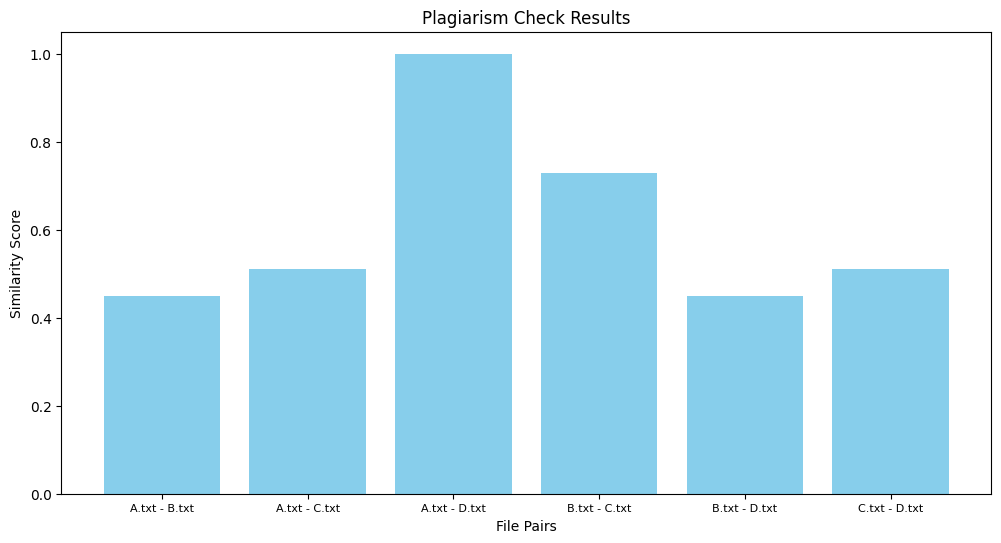

In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.txt') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = []

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 2)
                file1_name = os.path.basename(file_names[i])
                file2_name = os.path.basename(file_names[j])
                plagiarism_results.append((file1_name, file2_name, sim_score))

    return plagiarism_results

if __name__ == "__main__":
    zip_filename = "/content/Sample_Documents.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        if result:
            file1_names, file2_names, similarity_scores = zip(*result)
            x = np.arange(len(result))

            plt.figure(figsize=(12, 6))
            plt.bar(x, similarity_scores, color='skyblue')
            plt.xticks(x, [f'{file1} - {file2}' for file1, file2 in zip(file1_names, file2_names)], rotation=0)  # Horizontal labels
            plt.xlabel('File Pairs')
            plt.ylabel('Similarity Score')
            plt.title('Plagiarism Check Results')
            plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Set the x-axis tick spacing
            plt.xticks(fontsize=8)  # Adjust font size for labels

            plt.show()
        else:
            print("No plagiarism found.")
    else:
        print("The specified file does not exist.")


In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.pdf') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = {}

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 1)
                res = (f'{os.path.basename(file_names[i])} similar to {os.path.basename(file_names[j])}')
                plagiarism_results[res] = sim_score

    api = json.dumps(plagiarism_results)
    return api

if __name__ == "__main__":
    zip_filename = "/content/sample_doc_2.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        print(result)
    else:
        print("The specified file does not exist.")


{"alzahrani2009.pdf similar to An_automated_system_for_plagiarism_detection_using.pdf": 0.4}


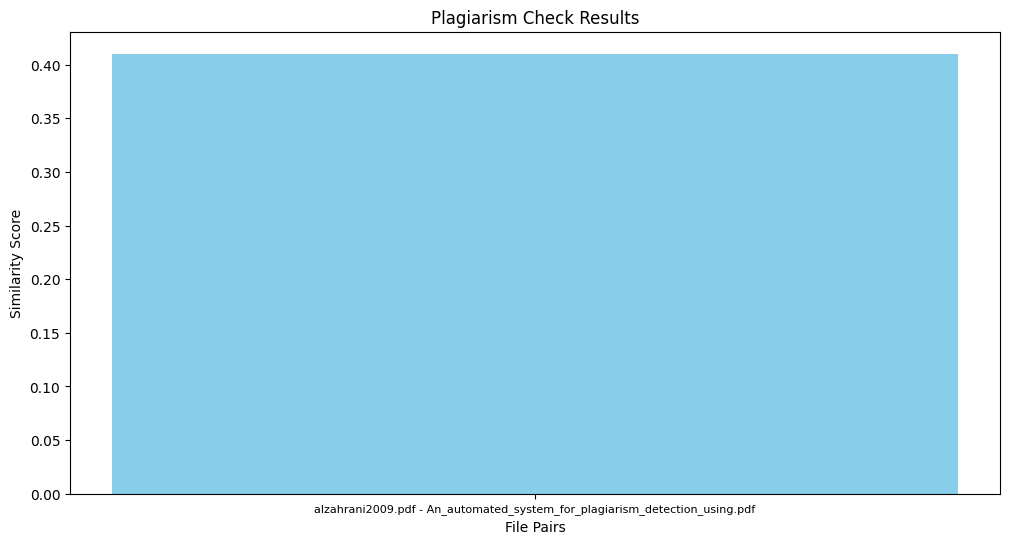

In [ ]:
import os
import urllib.parse
import json
import sys
import zipfile
import io
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def vectorize(Text):
    return TfidfVectorizer().fit_transform(Text).toarray()

def similarity(doc1, doc2):
    return cosine_similarity([doc1, doc2])

def read_text_files_from_zip(zip_filename):
    student_notes = []
    file_names = []
    with zipfile.ZipFile(zip_filename, 'r') as zipf:
        for file_info in zipf.infolist():
            if file_info.filename.endswith('.pdf') and not file_info.filename.startswith("._"):  # Only read .txt files and skip those starting with "._"
                with zipf.open(file_info) as file:
                    text = file.read().decode('latin-1')
                    student_notes.append(text)
                    file_names.append(file_info.filename)
    return student_notes, file_names

def check_plagiarism(zip_filename):
    student_notes, file_names = read_text_files_from_zip(zip_filename)
    vectors = vectorize(student_notes)

    plagiarism_results = []

    for i in range(len(student_notes)):
        for j in range(i + 1, len(student_notes)):
            sim_score = similarity(vectors[i], vectors[j])[0][1]
            if sim_score > 0:
                sim_score = round(sim_score, 2)
                file1_name = os.path.basename(file_names[i])
                file2_name = os.path.basename(file_names[j])
                plagiarism_results.append((file1_name, file2_name, sim_score))

    return plagiarism_results

if __name__ == "__main__":
    zip_filename = "/content/sample_doc_2.zip"
    if os.path.exists(zip_filename):
        result = check_plagiarism(zip_filename)
        if result:
            file1_names, file2_names, similarity_scores = zip(*result)
            x = np.arange(len(result))

            plt.figure(figsize=(12, 6))
            plt.bar(x, similarity_scores, color='skyblue')
            plt.xticks(x, [f'{file1} - {file2}' for file1, file2 in zip(file1_names, file2_names)], rotation=0)  # Horizontal labels
            plt.xlabel('File Pairs')
            plt.ylabel('Similarity Score')
            plt.title('Plagiarism Check Results')
            plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Set the x-axis tick spacing
            plt.xticks(fontsize=8)  # Adjust font size for labels

            plt.show()
        else:
            print("No plagiarism found.")
    else:
        print("The specified file does not exist.")
